# Artificial Neural Network

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data/combined_data/combined_data.csv")
df.head()

,AvgTemp,MaxTemp,MinTemp,SeaLevelPressure,AvgHumidity,TotalRainfallSnowmelt,AvgVisibility,AvgWindSpeed,MaxWindSpeed,RainDrizzle,Snow,ThunderStorm,Fog,PM 2.5
0,4.3,10.0,1.7,1023.1,94.0,0.00,8.0,13.0,22.2,0.0,0.0,0.0,0.0,40.080000
1,8.8,14.4,1.7,1021.4,89.0,0.00,10.3,8.9,20.6,0.0,0.0,0.0,0.0,42.400000
2,14.3,17.2,5.0,1016.6,84.0,0.76,12.4,15.2,24.1,0.0,0.0,0.0,0.0,31.250000
3,5.8,9.4,-2.2,1023.8,70.0,0.00,15.6,17.0,38.9,0.0,0.0,0.0,0.0,20.227273
4,2.1,4.0,-1.0,1025.9,49.0,0.00,16.1,20.9,29.4,0.0,0.0,0.0,0.0,17.100000


In [4]:
# split into dependent and independent features
X = df.iloc[:,:-1] # independent features
y = df.iloc[:,-1]  # dependent feature

#### Train test split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU
from tensorflow.keras.layers import Dropout

In [13]:
ANN_model = Sequential()

# The Input Layer :
ANN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
ANN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
ANN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
ANN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
ANN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
ANN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
ANN_model.summary()

# Fitting the ANN to the Training set
model_history=ANN_model.fit(X_train, y_train, validation_split=0.33, batch_size=10, nb_epoch=100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 166,657
Trainable params: 166,657
Non-trainable params: 0
_________________________________________________________________
Train on 1816 samples, validate on 895 samples
Epoch 1/100
1816/1816 [==============================] - 2s 924us/sam

In [14]:
prediction=ANN_model.predict(X_test)

In [17]:
prediction

array([[ 9.54086 ],
       [ 9.12548 ],
       [ 7.595663],
       ...,
       [ 7.75515 ],
       [10.151247],
       [ 6.865011]], dtype=float32)

In [18]:
y_test

3317     8.130769
3823     8.266667
562     10.600000
3687     5.100000
3344     7.615385
          ...    
3094     9.926316
3087     5.725000
396      9.731579
2875     5.058333
1100     7.628571
Name: PM 2.5, Length: 1163, dtype: float64

c:\users\tigju\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


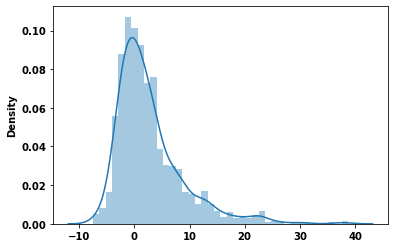

In [19]:
sns.distplot(y_test.values.reshape(-1,1)-prediction)

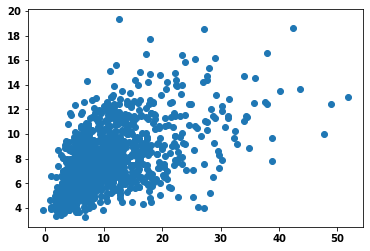

In [20]:
plt.scatter(y_test, prediction)

In [21]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 4.341517217826541
MSE: 45.11263273859026
RMSE: 6.716593834570485
